# color Threshold, Blue Screen

### import resource

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### read and display the image

In [7]:
# read in the image
image = cv2.imread('images/pizza_blue.png')

# print out the type of image and its dimensions
print("The image is", type(image), "and its dimensions is:", image.shape)

The image is <class 'numpy.ndarray'> and its dimensions is: (476, 779, 3)


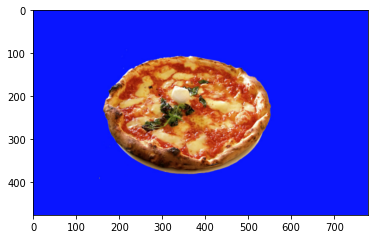

In [11]:
%matplotlib inline

# Since the image is bgr image instead of RGb
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

### Define the color threshold

In [19]:
# define the lower and upper bound for the value of blue
blue_lower = np.array([0,0, 200])
blue_upper = np.array([50, 80, 255])

### create a mask

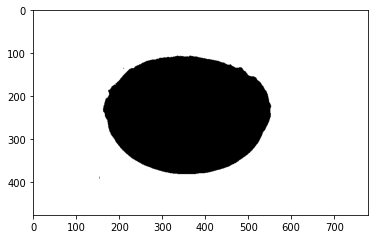

In [15]:
# define the masked area
mask = cv2.inRange(image_copy, blue_lower, blue_upper)

# visualize the mask
plt.imshow(mask, cmap="gray")

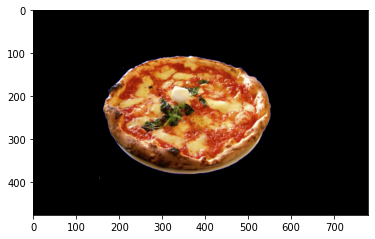

In [20]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# display it
plt.imshow(masked_image)

### Mask and add a background image

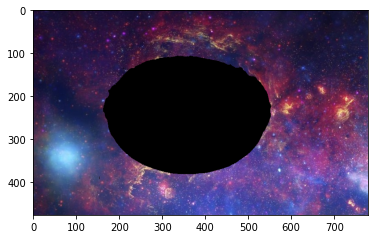

In [31]:
# laod in a backgroud image,  and covert it to RGB
background = cv2.imread('images/space.jpeg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# crop it to the right size (476 x 779)
cropped_background = background[:476, 0:779]

# mask the cropped background so the pizza area is blocked
cropped_background[mask == 0] =[0, 0, 0]

# display the background
plt.imshow(cropped_background)

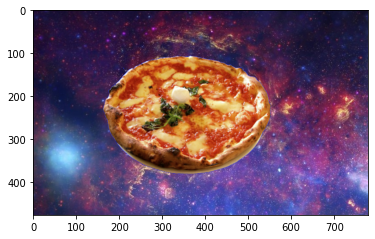

In [32]:
# add the two images together to create a complete image
complete_image = cropped_background + masked_image

# display the image
plt.imshow(complete_image)